<a href="https://colab.research.google.com/github/hagigat/NeuralNetwork/blob/master/Face_Recognition_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dir = "/content/drive/My Drive/Face"

width = 299
height = 299

In [0]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
data_generator = ImageDataGenerator(
    rotation_range = 10,
    horizontal_flip = True,
    # vertical_flip = True,
    zoom_range = 0.2,
    # width_shift_range = 0.2,
    height_shift_range = 0.1,
    rescale = 1 / 255,
    validation_split = 0.2,
)

train_data = data_generator.flow_from_directory(
    dir,
    target_size = (width, height),
    # save_to_dir = '/content/drive/My Drive/Colab Notebooks/augment_animals',
    class_mode = 'categorical',
    subset = 'training'
)

val_data = data_generator.flow_from_directory(
    dir,
    target_size = (width, height),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 30 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax'),
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 297, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

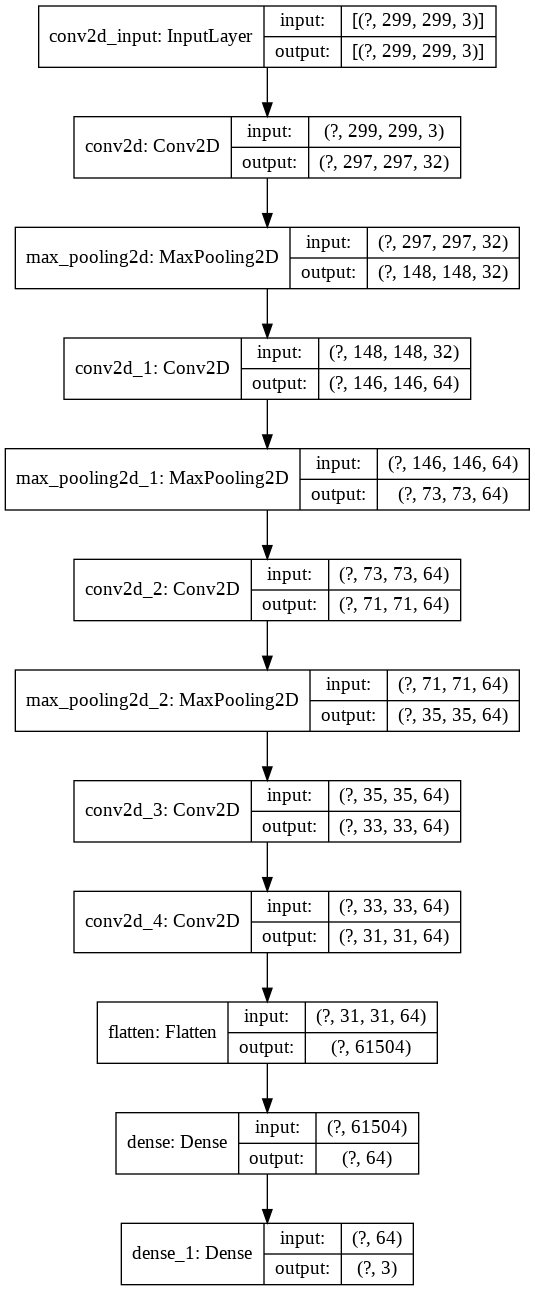

In [7]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [0]:
model.compile(optimizer=Adam(), 
              loss = tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [0]:
batch_size = 1

output = model.fit(
    train_data,
    steps_per_epoch = train_data.samples // batch_size,
    epochs = 5,
    validation_data = val_data, 
    validation_steps = val_data.samples // batch_size,    
    class_weight = {0:1 , 1:1 , 2:2},
    shuffle = True
)

Epoch 1/5
30/30 [==============================] - 34s 1s/step - loss: 1.1694 - accuracy: 0.5722 - val_loss: 0.8249 - val_accuracy: 0.6667
Epoch 2/5
30/30 [==============================] - 34s 1s/step - loss: 0.3556 - accuracy: 0.8778 - val_loss: 0.8329 - val_accuracy: 0.6944
Epoch 3/5
30/30 [==============================] - 34s 1s/step - loss: 0.1570 - accuracy: 0.9467 - val_loss: 1.7313 - val_accuracy: 0.6667
Epoch 4/5
30/30 [==============================] - 35s 1s/step - loss: 0.0920 - accuracy: 0.9689 - val_loss: 1.3641 - val_accuracy: 0.8056
Epoch 5/5
30/30 [==============================] - 34s 1s/step - loss: 0.0458 - accuracy: 0.9889 - val_loss: 0.3555 - val_accuracy: 0.8889


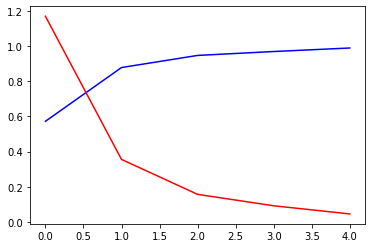

In [0]:
plt.plot(output.history['accuracy'], color='b', label ='accuracy')
plt.plot(output.history['loss'], color='r' , label='loss')
plt.show()